# On Montecarlo
Montecarlo methods are used for approximating complex probabilistic systems

Quantum computers offer the possibility of improving efficiency of such methods by one order of magnitude, using techniques such as QAE and IQAE. But first lets see how MC methods work

In [3]:
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np # importando numpy
import pandas as pd # importando pandas
from scipy import stats

np.random.seed(1984) # para poder replicar el random

%matplotlib inline

## The oldest trick. Estimate Pi

In [24]:
# Estimate pi value based on a circle with radius 1

def mc_pi_approximation(N=10000):
    plt.figure(figsize=(8,8))
    x, y = np.random.uniform(-1, 1, size=(2, N))
    circle_points = (x**2 + y**2) <= 1

    # Circle area is pi*r^2. Square is r*r
    # Pi estimation is then 4 * circle points / square points --> ( pi / 4 = circle points / total points )
    pi = circle_points.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    square_points = np.invert(circle_points)

    plt.plot(x[circle_points], y[circle_points], 'g.')
    plt.plot(x[square_points], y[square_points], 'b.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'.format(pi,error), alpha=0)
    plt.legend()

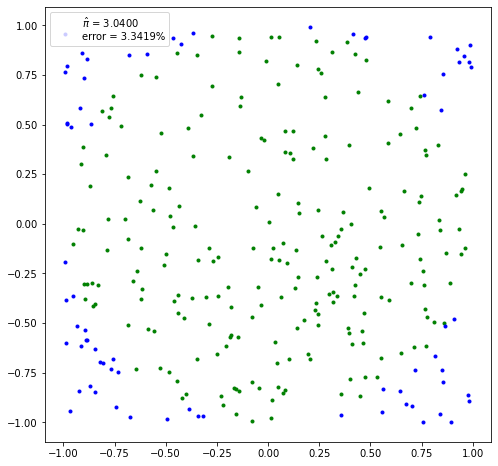

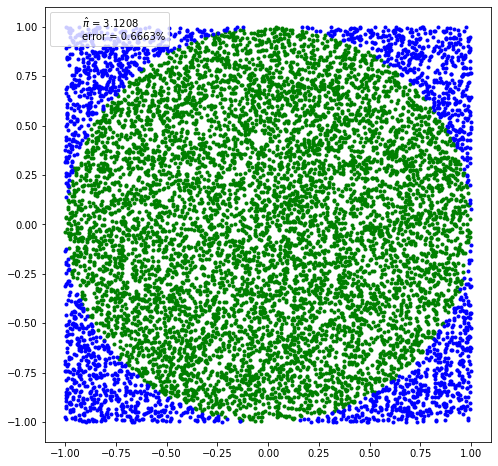

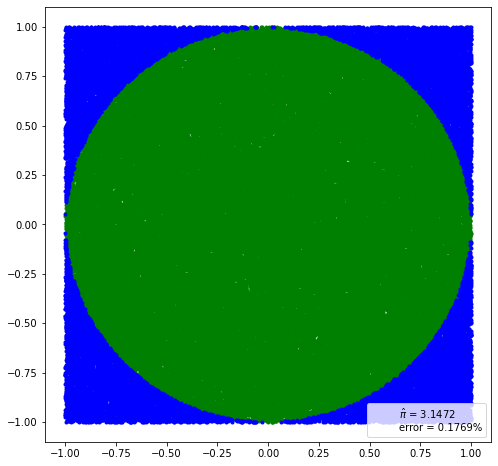

In [26]:
mc_pi_approximation(300)
mc_pi_approximation(10000)
mc_pi_approximation(100000)

In [27]:
# Metropolis-Hastings MCMC
def metropolis(func, steps=10000):

    samples = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        acceptance = new_prob / old_prob
        if acceptance >= np.random.random():
            samples[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            samples[i] = old_x
    
    return samples

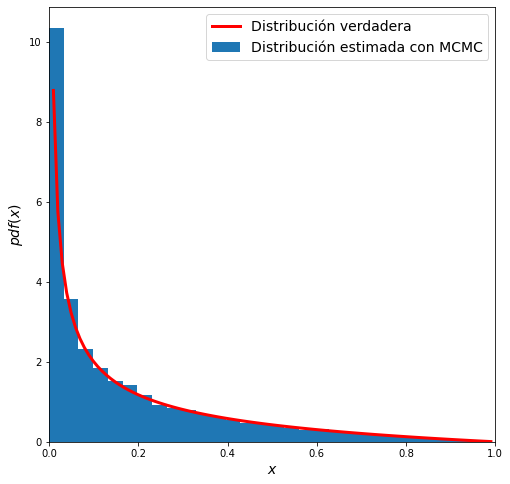

In [28]:
# distribución beta
func = stats.beta(0.4, 2)
samples = metropolis(func=func, steps=100000)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='Distribution')
plt.hist(samples, bins=30, density=True, label='MCMC estimation')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

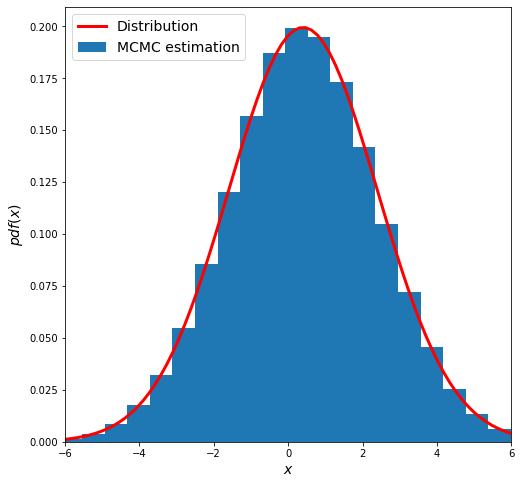

In [33]:
# distribución normal
func = stats.norm(0.4, 2)
samples = metropolis(func=func, steps=10000)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribution')
plt.hist(samples, bins=30, density=True, label='MCMC estimation')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

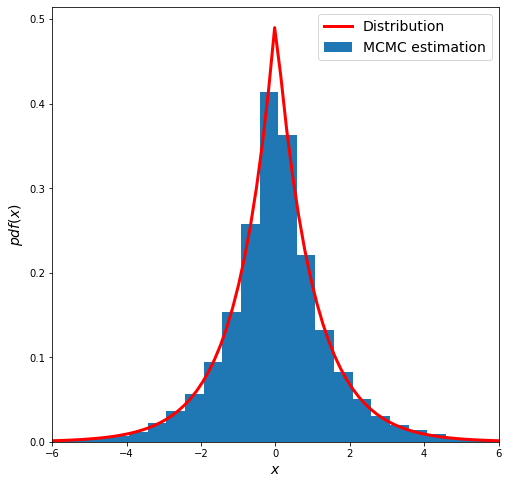

In [32]:
# distribución normal
func = stats.laplace()
samples = metropolis(func=func, steps=100000)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribution')
plt.hist(samples, bins=30, density=True, label='MCMC estimation')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()